In [1]:
import pandas as pd
import os

In [2]:
topic = 'atheism'
scheme = 'EII'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/atheism/EII'

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1344430124624715776,Is Belief in God a Delusion? - Neuroscience Ne...,-1,Against,-1,Against,0,Uknown,0,Uknown,2020-12-30 17:48:14
1,1344427155141386252,"I haven’t even been on twitter for a week, I h...",0,Uknown,1,Favor,0,Uknown,0,Uknown,2020-12-30 17:36:26
2,1344425588468146177,The Crabs are LIVE RIGHT NOW--&gt; https://t....,0,Uknown,0,Uknown,-1,Against,0,Uknown,2020-12-30 17:30:13
3,1344422478702129155,Watching people feel devotional by bathing the...,-1,Against,-1,Against,-1,Against,0,Uknown,2020-12-30 17:17:51
4,1344420258799607808,Some of the benefits of Christianity cited by ...,0,Uknown,-1,Against,0,Uknown,0,Uknown,2020-12-30 17:09:02


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,-1,Is Belief in God a Delusion? - Neuroscience Ne...
1,1,"I haven’t even been on twitter for a week, I h..."
2,0,The Crabs are LIVE RIGHT NOW--&gt; https://t....
3,-1,Watching people feel devotional by bathing the...
4,-1,Some of the benefits of Christianity cited by ...


In [7]:
train.Label.unique()

array([-1,  1,  0])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([-1,  1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,7366
1,6061


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,He who exalts himself shall be humbled; a...,AGAINST,Atheism
1,RT @prayerbullets: I remove Nehushtan -previou...,AGAINST,Atheism
2,@Brainman365 @heidtjj @BenjaminLives I have so...,AGAINST,Atheism
3,#God is utterly powerless without Human interv...,AGAINST,Atheism
4,@David_Cameron Miracles of #Multiculturalism...,AGAINST,Atheism


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,465
1,124


In [14]:
train.shape, test.shape

((13427, 2), (589, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [19]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

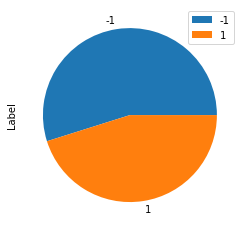

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

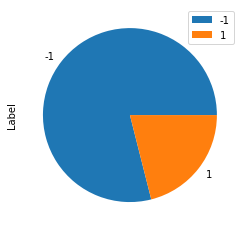

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

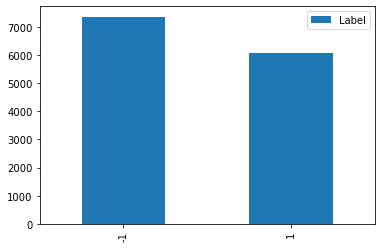

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

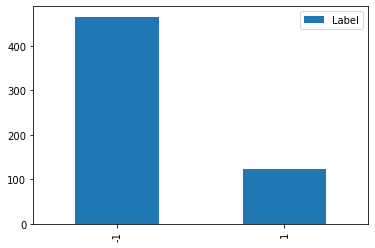

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,-1,Is Belief in God a Delusion? - Neuroscience Ne...
1,1,"I haven’t even been on twitter for a week, I h..."
2,-1,Watching people feel devotional by bathing the...
3,-1,Some of the benefits of Christianity cited by ...
4,-1,Here is the problem for #atheists. They want t...
...,...,...
13422,-1,n #Minister of #Science and higher URL
13423,1,Ready for some good books? Here are SHL’s curr...
13424,-1,Ten Proofs for the Existence of God #GodSpeaks...
13425,-1,The New York Public Library Has Calculated Its...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13427 entries, 0 to 13426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   13427 non-null  int64 
 1   Tweet   13427 non-null  object
dtypes: int64(1), object(1)
memory usage: 209.9+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   589 non-null    int64 
 1   Tweet   589 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13427 entries, 0 to 13426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   13427 non-null  int64 
 1   Tweet   13427 non-null  object
dtypes: int64(1), object(1)
memory usage: 314.7+ KB


# Training

In [29]:
from fastai.text import *

In [30]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.2)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [31]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"joke xxrep 4 . xxunk xxbos xxmaj watching people feel devotional by xxunk the gods in holy water , xxunk xxunk , etc , xxunk these idols in xxunk , feeding the xxunk always xxunk me . xxmaj is n't this just what children do ? xxbos xxmaj here is the problem for # atheists . xxmaj they want to change xxmaj god and not themselves . xxmaj god xxup"
1,", that just might be it . xxup url xxbos xxmaj freedom of expression remains under threat around the world . xxup url xxbos xxmaj xxunk xxunk says it was the middle one . xxup url xxbos xxmaj it ’s amazing how xxmaj gods will always xxunk with your own , never xxunk . xxbos xxmaj the xxmaj human xxmaj brain xxmaj produces the xxmaj human xxmaj mind just as"
2,"are xxup url xxbos xxup tonight xxup user xxup xxunk ! xxmaj evolution xxmaj vs xxup id xxup user & & xxup user vs xxup user & & xxmaj xxunk xxup url xxwrep 8 xxup user # atheism xxup user xxup url xxbos xxmaj tippling xxmaj philosopher : xxup url xxbos # xxmaj christians put the blame on man for misunderstanding . xxmaj but really , who 's to blame"
3,". xxmaj he got really close to realizing that xxmaj god is xxunk and all - knowing and therefore , xxunk in xxmaj satan ’s deception . xxbos xxmaj john xxmaj loftus is xxunk xxunk at times . xxmaj he got really close to one of my lines of argument and then xxunk off tourl xxmaj he also has a great argument against xxmaj christianity that he fails to develop"
4,"the damage this is causing to the separation of state and church . via / r / atheism xxbos xxup live at 3 xxup est ! # improvbiblestudy # xxmaj atheism # xxmaj atheist xxup isaiah xxup speaks xxup out ! xxup url via xxup user xxbos xxmaj real xxmaj xxunk , primarily made up of emotional , xxunk what i would call "" thinkers "" , blocks me for"


In [32]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.show_batch()

text,target
"xxbos [ xxmaj we ( # xxmaj god ) said ] , "" o # xxmaj david , indeed xxmaj we have made you a # xxunk upon the # earth , so # xxmaj judge between the # people in # truth and do not follow [ your own ] # desire , as it will lead you # astray from the way of # xxmaj allah ( #",-1
"xxbos xxup user xxup user xxmaj actually , xxunk 16 yrs ago , group i co - found , # xxunk ( # xxmaj xxunk -- mostly # atheists ) , put on # forum on atheism & & # religion . # xxmaj christian # student said : "" i xxup tried being an atheist , but ( etc ) "" i told him : xxmaj you ca n't",1
xxbos # xxmaj universe # xxmaj creation # xxmaj world # xxmaj agnostic # xxmaj atheist # xxmaj humanist # xxmaj evolution # xxmaj atheism # xxmaj humanism # xxmaj school # xxmaj teachers # xxmaj students # xxmaj university # xxmaj professors # xxmaj learn # xxmaj real # xxmaj science # xxmaj while # xxmaj being # xxmaj xxunk :) # xxmaj see xxmaj more xxmaj reasons xxmaj,1
"xxbos # xxunk # jesuschrist # faith # homophobia # religious # xxmaj atheism # atheist # xxmaj equality xxmaj one 's xxmaj sexuality xxmaj is xxmaj not a xxmaj choice . xxmaj one 's xxmaj religion xxmaj is a xxmaj choice . xxmaj therefore , if you xxmaj oppose xxmaj equality for xxmaj gays , xxmaj you xxmaj choose to be a xxmaj bigot and xxmaj choose to xxmaj",-1
xxbos xxwrep 46 xxup user xxmaj truth & & xxmaj love is xxunk shared with us via xxup god xxmaj himself . # xxmaj peace in xxunk : # xxup god is on the xxmaj throne ! xxup every good & & perfect gift is from xxmaj him . xxmaj the xxmaj almighty xxmaj faithful xxmaj father who loves & & keeps xxmaj his xxmaj word & & us perfectly,1


In [34]:
f'data_clas_{topic}_{scheme}'

'data_clas_atheism_EII'

In [35]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [36]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '#'],
 5712)

In [37]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 5.25E-02


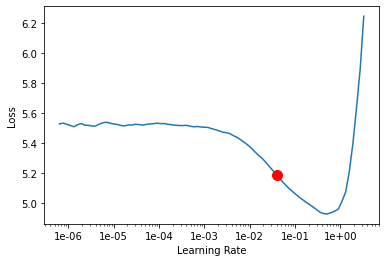

In [38]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [39]:
learn_lm.fit_one_cycle(10,3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.307953,3.603304,0.335480,00:25
1,3.628011,3.287197,0.379549,00:26
2,3.345258,3.260219,0.389881,00:26
3,3.167356,3.237592,0.396142,00:27
4,3.007126,3.241130,0.398129,00:27
5,2.852317,3.230154,0.402806,00:27
6,2.700673,3.217146,0.407324,00:27
7,2.566339,3.216465,0.409534,00:27
8,2.472017,3.209046,0.410162,00:28
9,2.427835,3.207836,0.411820,00:28


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 3.31E-07


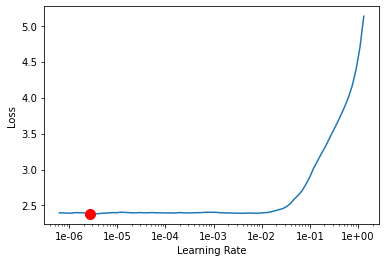

In [40]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [41]:
learn_lm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.387835,3.195070,0.414849,00:37
1,2.335347,3.170902,0.420111,00:38
2,2.243963,3.165393,0.424617,00:38
3,2.154442,3.179800,0.424968,00:37
4,2.093971,3.186765,0.425978,00:38


In [42]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [43]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [44]:
learn_lm.save(f'{topic}_model_v1')

In [45]:
learn_lm.load(f'{topic}_model_v1');

In [46]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [47]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [48]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [49]:
learn.save('learner-1stage')

In [50]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 2.09E-02


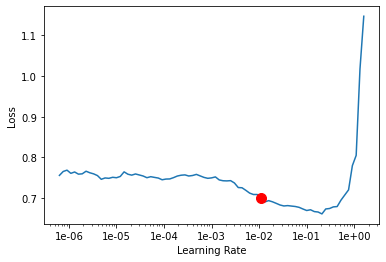

In [51]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [52]:
learn.fit_one_cycle(10,1e-2,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.548302,0.499425,0.554321,00:20
1,0.541777,0.554663,0.585309,00:24
2,0.538200,0.478383,0.495758,00:23
3,0.534437,0.507010,0.526916,00:25
4,0.507641,0.485375,0.496713,00:24
5,0.491498,0.521041,0.578922,00:23
6,0.497480,0.517973,0.557874,00:27
7,0.485857,0.496331,0.519854,00:25
8,0.482943,0.507913,0.540381,00:21
9,0.506515,0.511916,0.554176,00:26


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [53]:
learn.save('learner-2stage')

In [54]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 9.12E-06


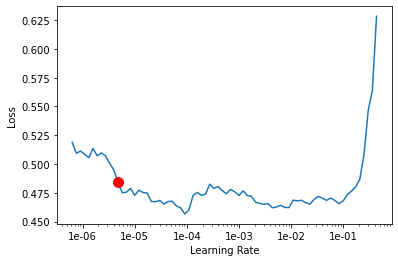

In [55]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [56]:
learn.fit_one_cycle(5, 4.8e-6,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.468467,0.517122,0.549016,00:22
1,0.476426,0.508807,0.540518,00:22
2,0.476032,0.524115,0.573049,00:20
3,0.475946,0.523735,0.564658,00:22
4,0.472500,0.530192,0.560469,00:24


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [57]:
learn.save('learner-3stage')

In [58]:
learn.load('learner-3stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.91E-05


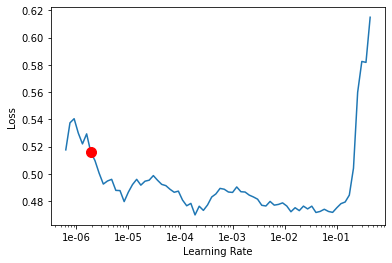

In [59]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-06


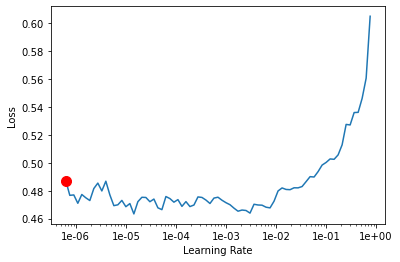

In [60]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [61]:
learn.fit_one_cycle(5,1e-7,moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time
0,0.469460,0.504647,0.536586,00:27
1,0.468361,0.522535,0.560999,00:28
2,0.475893,0.503970,0.535426,00:27
3,0.479521,0.524870,0.574851,00:30
4,0.468844,0.505084,0.541600,00:29


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [62]:
learn.save('learner-stage-freeze-2')

In [63]:
learn.save('learner-stage-freeze-2')

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.98E-07


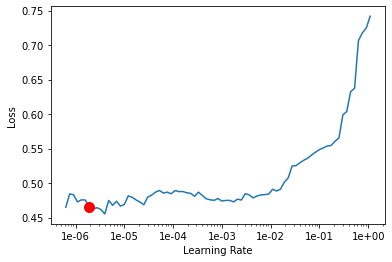

In [64]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(3, 1e-7, moms=(0.8, 0.7))

In [ ]:
learn.save('learner-stage-freeze-3')

In [ ]:
learn.load('learner-stage-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


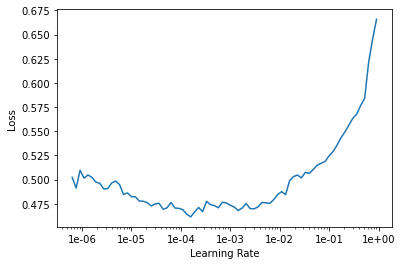

In [65]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [66]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.444690,0.509233,0.572342,01:05
1,0.401518,0.541822,0.627201,00:57
2,0.347739,0.563191,0.612154,01:06


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [67]:
learn.save('learner-stage-unfreeze-62')

In [68]:
learn.load('learner-stage-unfreeze-62');

In [69]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

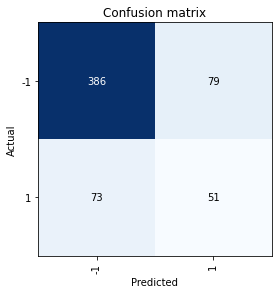

In [70]:
interp.plot_confusion_matrix()

In [ ]:
preds

In [71]:
learn.save('learner-final')